In [1]:
require(ACTIONet)

Loading required package: ACTIONet

Loading required package: Rcpp

Loading required package: RcppArmadillo

Loading required package: Matrix

Loading required package: R.utils

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.10.1 (2020-08-26 22:50:31 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, inherits, isOpen, nullf

In [2]:
#data path 
data_path="liver"
metadata_path=paste(data_path,"Single_cell_RNA_sequencing_of_human_liver_reveals_distinct_intrahepatic_macrophage_populations.metadata.tsv",sep='/')

In [3]:
#Import data 
ace = import.ace.from.10X.generic(data_path, mtx_file = "matrix.mtx.gz", feature_annotations = "features.tsv", sample_annotations = "barcodes.tsv")
cell.annotations = read.table(metadata_path, sep = "\t", header = T)
colData(ace) = DataFrame(cell.annotations)
ace

Reading counts ...




class: ACTIONetExperiment 
dim: 18715 8439 
metadata(0):
assays(1): counts
rownames(18715): feat_1 feat_2 ... feat_18714 feat_18715
rowData names(1): feature_name
colnames: NULL
colData names(6): BBrowser_barcodes Barcodes ... Cell.type
  BioTuring...Cell.type
rowMaps(0): 
colMaps(0): 
rowNets(0): 
colNets(0): 

In [4]:
# Run ACTIONet
ace = reduce.ace(ace)


Normalizing ace object ...


Running main reduction.




In [5]:
ace = run.ACTIONet(ace)

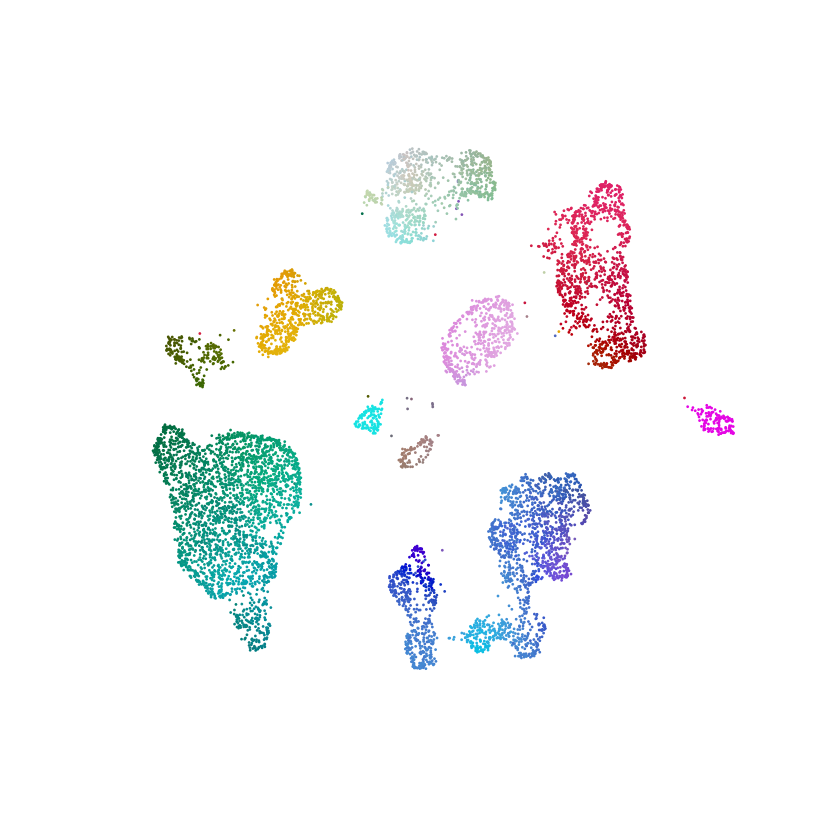

In [6]:
#plot ACTIONet
## De novo color
plot.ACTIONet(ace)

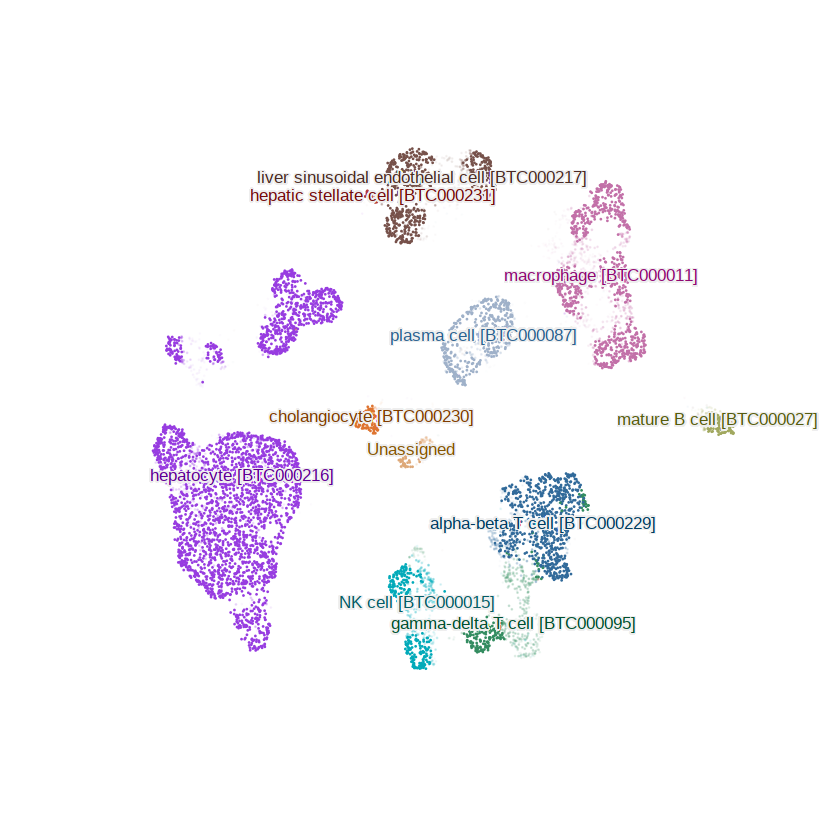

In [7]:
## Cell types + confidence as transparency
plot.ACTIONet(ace, ace$BioTuring...Cell.type, transparency.attr = ace$node_centrality)


Loading required package: viridis

Loading required package: viridisLite


Attaching package: ‘viridisLite’


The following objects are masked from ‘package:pals’:

    cividis, inferno, magma, plasma, viridis



Attaching package: ‘viridis’


The following objects are masked from ‘package:pals’:

    cividis, inferno, magma, plasma, viridis




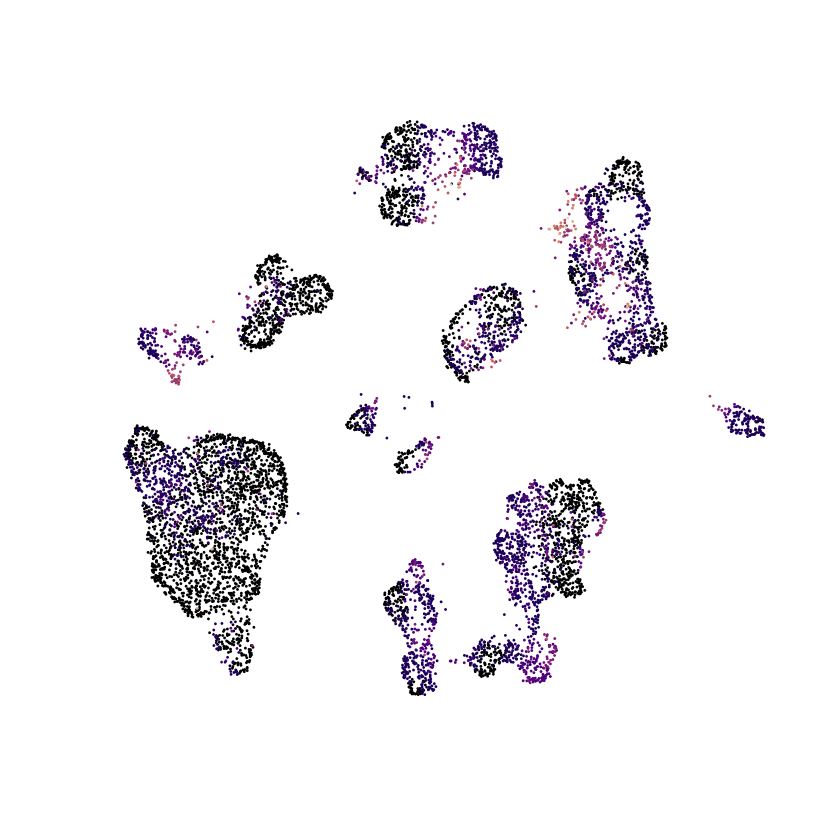

In [8]:
## cell quality
x = exp(-scale(ace$node_centrality))
plot.ACTIONet.gradient(ace, x)

In [9]:
# Cell type annotation
markers <- list(Hepatocytes = c("ALB", "HAMP", "ARG1","PCK1", "AFP", "BCHE"), 
            LSECs = c("CALCRL", "CD32B","VWF"), 
            Cholangiocytes = c("KRT19", "EPCAM", "FXDY2","CLDN4", "CLDN10", "SOX9", "MMP7", "CXCL1", "CFTR", "TFF2","KRT7", "CD24"), 
            `Hepatic Stellate Cells` = c("ACTA2","COL1A1", "TAGLN", "COL1A2", "COL3A1", "SPARC", "RBP1","DCN", "MYL9"), 
             Macrophages = c("CD68", "MARCO"), 
            `ab T cells` = c("CD2","CD3D", "TRAC", "IL32", "CD3E"), 
            `gd T cells` = c("NKG7","FCGR3A", "HOPX", "GNLY"), 
            `NK cells` = c("GZMK", "KLRF1","CCL3", "CMC1"), 
            `Plasma cells` = c("CD27", "IGHG1"),
            `Mature B cells` = c("MS4A1", "LTB", "CD52", "IGHD"),
            `Erythroid cells` = c("HBB", "SLC25A37", "CA1", "ALAS2"))

Loading required package: stringr



[1] "No markers are left"


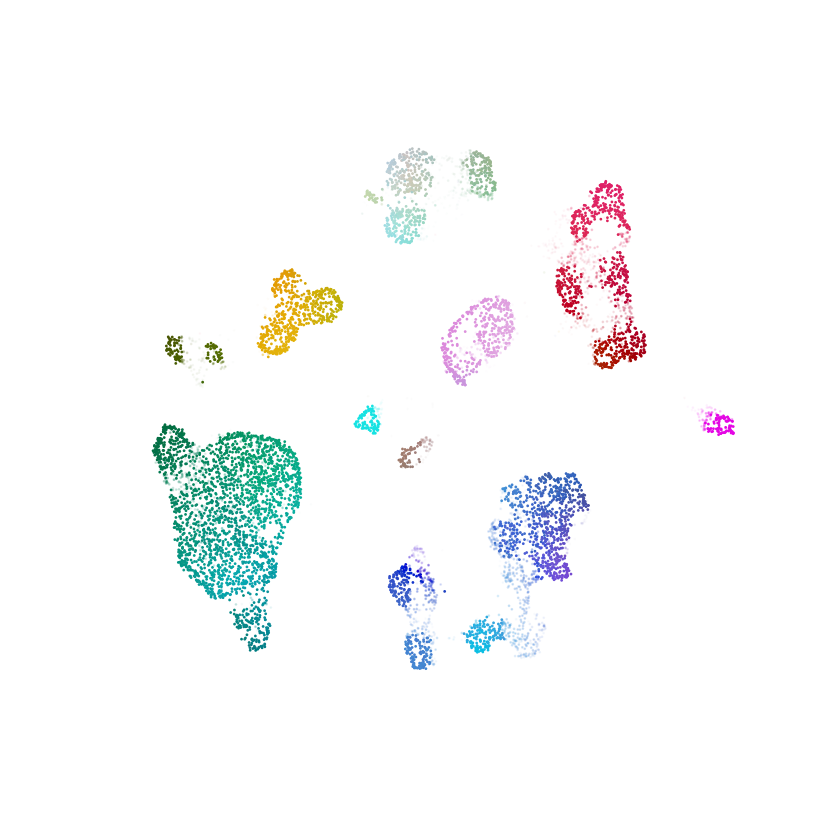

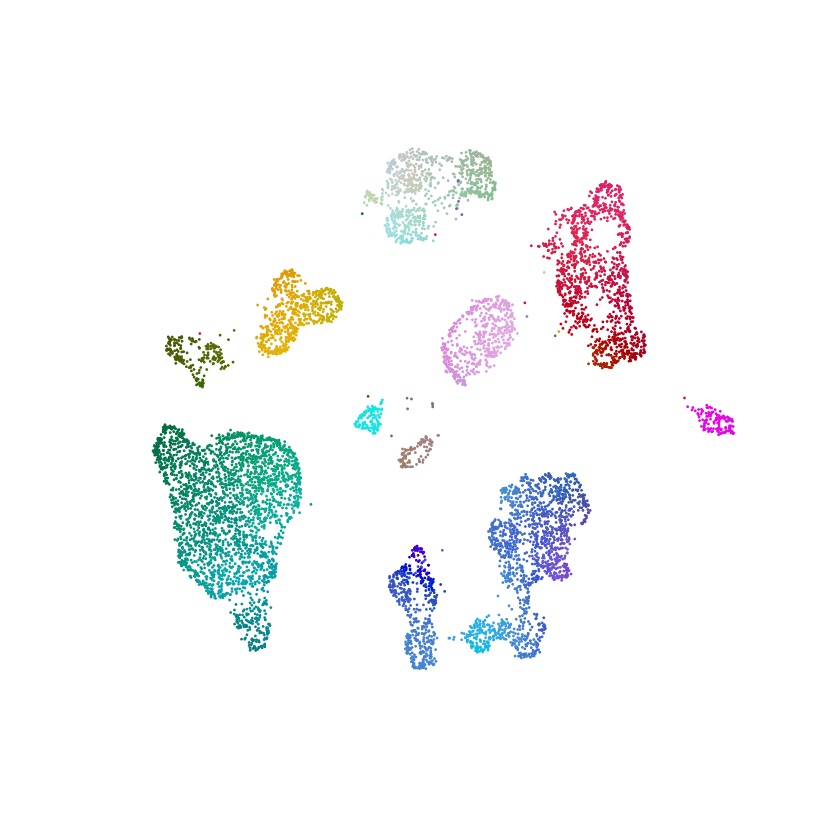

In [10]:
## Annotate using pagerank
cell.annot = annotate.cells.using.markers(ace, markers)
plot.ACTIONet(ace, cell.annot$Labels, transparency.attr = ace$node_centrality)
plot.ACTIONet(ace, cell.annot$Labels, transparency.attr = cell.annot$Labels.confidence)

[1] "Perform graph clustering with *prior* initialization"


Not enough colors. Switching to CPal88



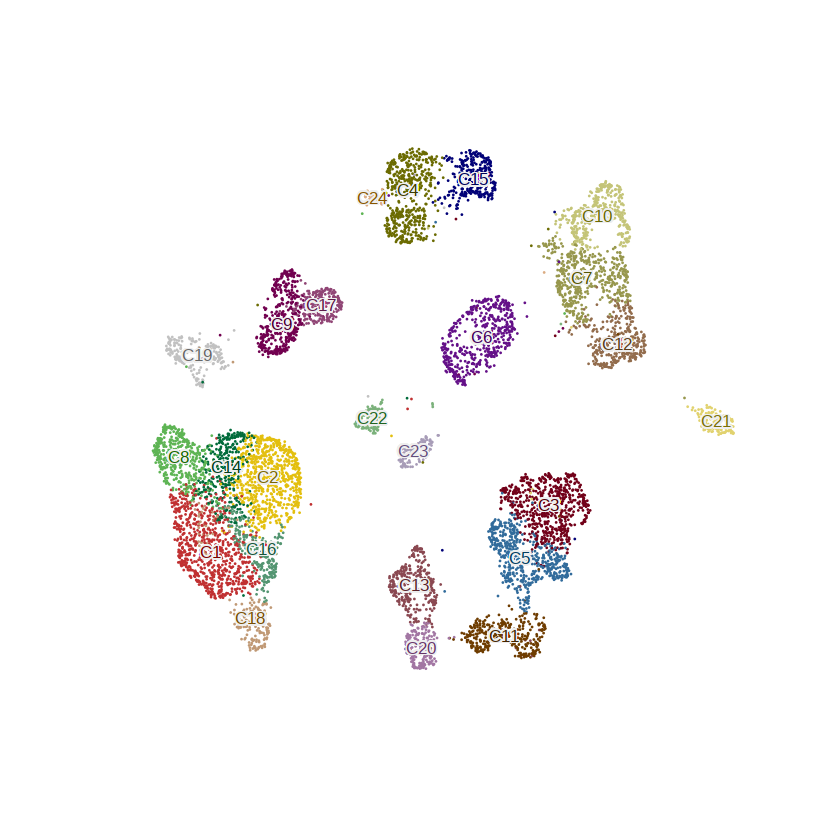

In [11]:
# Clustering
cl = ACTIONet::Leiden.clustering(ace, resolution_parameter = 2)
plot.ACTIONet(ace, cl)

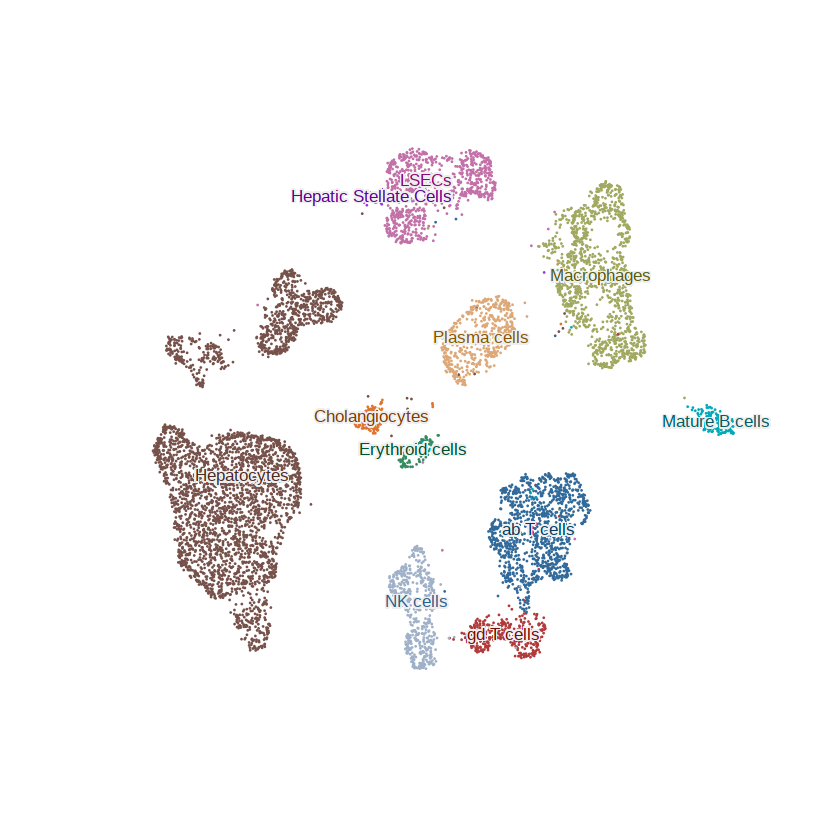

In [12]:
cl.annot = annotate.clusters.using.labels(ace, cl, ace$Cell.type)
cluster.based.labels = cl.annot$Labels[cl]
plot.ACTIONet(ace, cluster.based.labels)


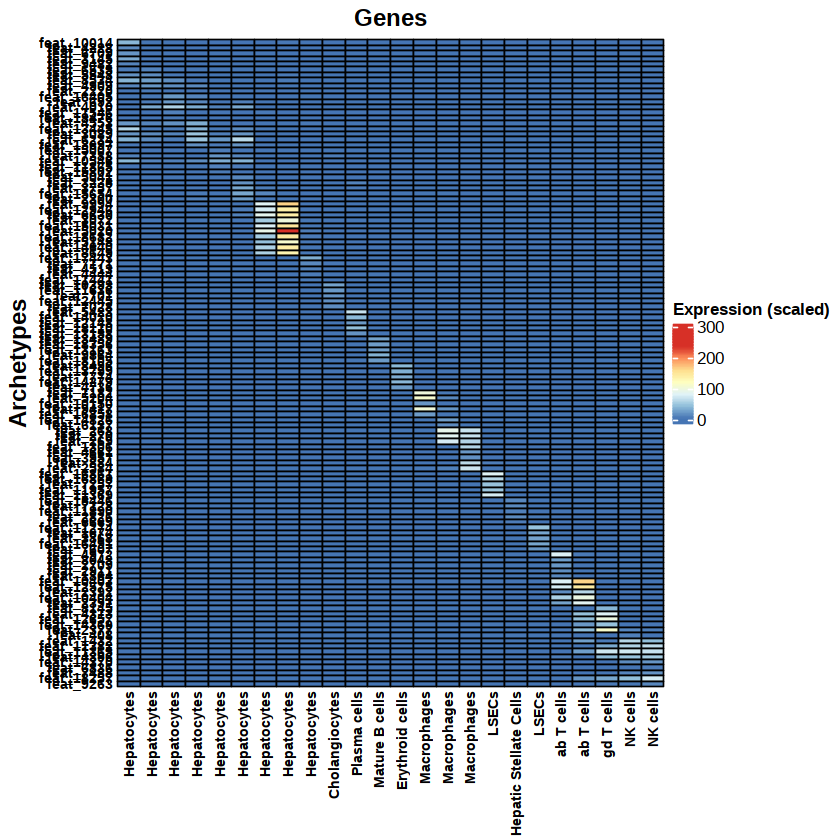

In [13]:
ace = ACTIONet::compute.cluster.feature.specificity(ace, cl, "leiden_spec")

cl.diff.exp = ace$leiden_spec_feature_specificity
colnames(cl.diff.exp) = cl.annot$Labels

plot.top.k.features(cl.diff.exp, 5)

In [14]:
# Export
ACE2AnnData(ace, "liver/ACTIONet.h5ad")
ace

Warning message in if ((class(obj) %in% c("list", "SimpleList")) & (depth < max.depth)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(obj) %in% c("data.frame", "DataFrame", "DFrame")) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if ((class(obj) %in% c("list", "SimpleList")) & (depth < max.depth)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(obj) %in% c("data.frame", "DataFrame", "DFrame")) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if ((class(obj) %in% c("list", "SimpleList")) & (depth < max.depth)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(obj) %in% c("data.frame", "DataFrame", "DFrame")) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if ((class(obj) %in% c("list", "Simp

[1] "Full export mode"


class: ACTIONetExperiment 
dim: 18715 8439 
metadata(6): normalization.method ACTION_sigma ...
  selected_archetypes_ontology_annotations backbone
assays(2): counts logcounts
rownames(18715): feat_1 feat_2 ... feat_18714 feat_18715
rowData names(1): feature_name
colnames(8439): sam_1 sam_2 ... sam_8438 sam_8439
colData names(8): BBrowser_barcodes Barcodes ... assigned_archetype
  node_centrality
rowMaps(2): unified_feature_specificity leiden_spec_feature_specificity
colMaps(6): ACTION ACTIONred ACTIONet2D ACTIONet3D denovo_color archetype_footprint
rowNets(0): 
colNets(1): ACTIONet